In [7]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [8]:
crackdensity_df = pd.DataFrame()
crackdensity_df['Temperature'] = None
crackdensity_df['Density'] = None

cracklength_df = pd.DataFrame()
cracklength_df['Temperature'] = None
cracklength_df['Length'] = None

In [9]:
def computeDensity(filename, df_crack, df_length):
  
  #Segment each Image into smaller tiles
  
  image = cv2.imread(filename)
  img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  area = img_rgb.shape[0]*img_rgb.shape[1]
  
  m = 250
  n = 250
  tiles = [img_rgb[x:x+m,y:y+n] for x in range(0,img_rgb.shape[0],m) for y in range(0,img_rgb.shape[1],n)]
  
  for i in range(len(tiles)):
    seg_rgb = cv2.cvtColor(tiles[i], cv2.COLOR_BGR2RGB)
    cv2.imwrite('segmented_{}.jpg'.format(i), seg_rgb)
    
  sumLength = 0
  
  #For each segmented image, calculate the total edge length
  for i in range(86):

      img = cv2.imread('segmented_{}.jpg'.format(i))

      # Convert into gray scale
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      # Image processing ( smoothing )
      # Averaging
      # gray = cv.gray(gray,(3,3))
      
      total_edge_length = 0

      # Apply logarithmic transform
      img_log = (np.log(gray+1)/(np.log(1+np.max(gray))))*255

      # Specify the data type
      img_log = np.array(img_log,dtype=np.uint8)

      # Image smoothing: bilateral filter
      bilateral = cv2.bilateralFilter(img_log, 5, 75, 75)

      # Canny Edge Detection
      edges = cv2.Canny(bilateral,100,200)
      
      # Morphological Closing Operator
      kernel = np.ones((5,5),np.uint8)
      closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

      # Create feature detecting method
      # sift = cv.xfeatures2d.SIFT_create()
      # surf = cv.xfeatures2d.SURF_create()
      orb = cv2.ORB_create(nfeatures=1500)

      # Make featured Image
      keypoints, descriptors = orb.detectAndCompute(closing, None)
      featuredImg = cv2.drawKeypoints(closing, keypoints, None)
      featuredImg = cv2.bitwise_not(featuredImg)

      cv2.imwrite('edge_{}.jpg'.format(i), featuredImg)
      
      contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      
      contour_img = np.zeros_like(img)
      
      for contour in contours:
          cv2.drawContours(contour_img, [contour], 0, (0, 0, 255), 2)
      
      for c in range(len(contours)):
          length = cv2.arcLength(contours[c], True)
          total_edge_length+=length
      
      sumLength += total_edge_length
      
  # Calculate density for each image
  density = sumLength/area

  
  # Add values to a dataframe
  temp = filename[0:3]
  new_row = {'Temperature': temp, 'Density': density}
  df_crack.loc[len(df_crack)] = new_row
  
  new_row = {'Temperature': temp, 'Length': sumLength}
  df_length.loc[len(df_length)] = new_row


In [11]:
import os

def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        if filename == ".DS_Store":
            continue
        fname = os.path.join(folder,filename)
        print(fname)
        computeDensity(fname, crackdensity_df, cracklength_df)


folder_names = [' 25/10X/XP','100/10X/XP','200/10X/XP','300/10X/XP','400/10X/XP','500/10X/XP']
#'images/ 25/4X/XP','images/100/4X/XP','images/200/4X/XP','images/300/4X/XP','images/400/4X/XP','images/500/4X/XP'
for x in folder_names:
    load_images_from_folder(x)
        
    

 25/10X/XP/8.jpg
 25/10X/XP/9.jpg
 25/10X/XP/14.jpg
 25/10X/XP/15.jpg
 25/10X/XP/12.jpg
 25/10X/XP/13.jpg
 25/10X/XP/11.jpg
 25/10X/XP/10.jpg
 25/10X/XP/4.jpg
 25/10X/XP/5.jpg
 25/10X/XP/7.jpg
 25/10X/XP/6.jpg
 25/10X/XP/2.jpg
 25/10X/XP/3.jpg
 25/10X/XP/1.jpg
100/10X/XP/8.jpg
100/10X/XP/9.jpg
100/10X/XP/14.jpg
100/10X/XP/15.jpg
100/10X/XP/12.jpg
100/10X/XP/13.jpg
100/10X/XP/11.jpg
100/10X/XP/10.jpg
100/10X/XP/4.jpg
100/10X/XP/5.jpg
100/10X/XP/7.jpg
100/10X/XP/6.jpg
100/10X/XP/2.jpg
100/10X/XP/3.jpg
100/10X/XP/1.jpg
200/10X/XP/8.jpg
200/10X/XP/9.jpg
200/10X/XP/14.jpg
200/10X/XP/15.jpg
200/10X/XP/12.jpg
200/10X/XP/13.jpg
200/10X/XP/11.jpg
200/10X/XP/10.jpg
200/10X/XP/4.jpg
200/10X/XP/5.jpg
200/10X/XP/7.jpg
200/10X/XP/6.jpg
200/10X/XP/2.jpg
200/10X/XP/3.jpg
200/10X/XP/1.jpg
300/10X/XP/8.jpg
300/10X/XP/9.jpg
300/10X/XP/14.jpg
300/10X/XP/15.jpg
300/10X/XP/12.jpg
300/10X/XP/13.jpg
300/10X/XP/11.jpg
300/10X/XP/14 2.jpg
300/10X/XP/10.jpg
300/10X/XP/4.jpg
300/10X/XP/5 2.jpg
300/10X/XP/5.jpg
30

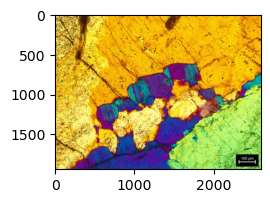

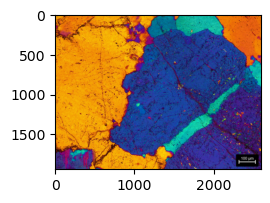

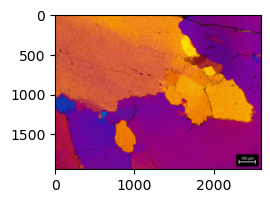

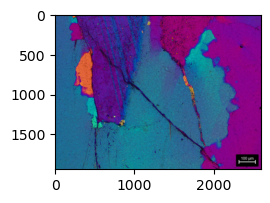

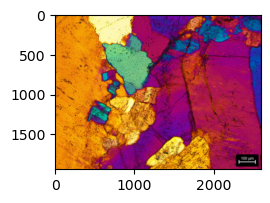

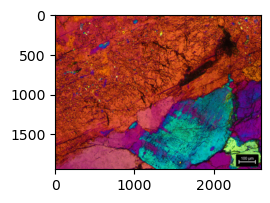

In [12]:
for x in folder_names:
    img = cv2.imread(x+"/8.jpg")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (20,2))
    plt.imshow(img_rgb)

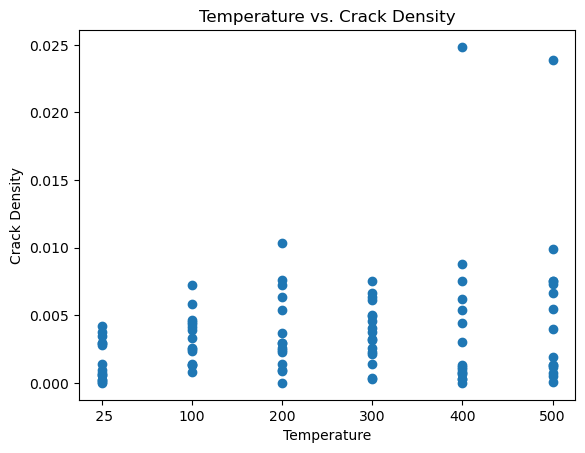

In [5]:
temperature = crackdensity_df['Temperature']
crack_density = crackdensity_df['Density']

# create scatter plot
plt.scatter(temperature, crack_density)

# add axis labels and title
plt.xlabel('Temperature')
plt.ylabel('Crack Density')
plt.title('Temperature vs. Crack Density')

# display plot
plt.show()

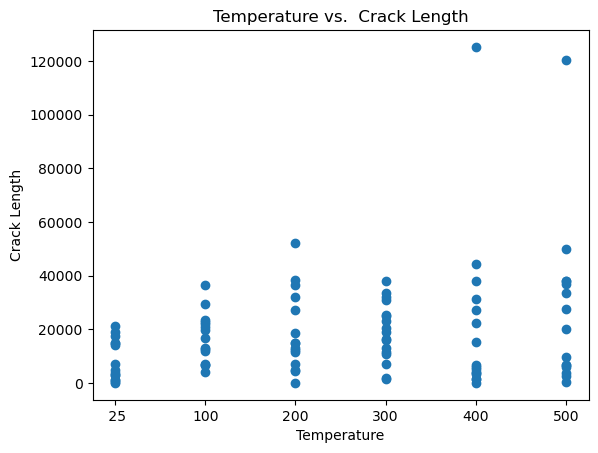

In [6]:
temperature = cracklength_df['Temperature']
crack_density = cracklength_df['Length']

# create scatter plot
plt.scatter(temperature, crack_density)

# add axis labels and title
plt.xlabel('Temperature')
plt.ylabel('Crack Length')
plt.title('Temperature vs.  Crack Length')

# display plot
plt.show()

In [7]:
crackdensity_avg_df = pd.DataFrame()
crackdensity_avg_df['Temperature'] = None
crackdensity_avg_df['Density'] = None


crack_avg = crackdensity_df.loc[:14, 'Density'].sum()/15
new_row = {'Temperature': ' 25', 'Density': crack_avg}
crackdensity_avg_df.loc[len(crackdensity_avg_df)] = new_row

crack_avg = crackdensity_df.loc[15:29, 'Density'].sum()/15
new_row = {'Temperature': '100', 'Density': crack_avg}
crackdensity_avg_df.loc[len(crackdensity_avg_df)] = new_row

crack_avg = crackdensity_df.loc[30:44, 'Density'].sum()/15
new_row = {'Temperature': '200', 'Density': crack_avg}
crackdensity_avg_df.loc[len(crackdensity_avg_df)] = new_row

crack_avg = crackdensity_df.loc[45:60, 'Density'].sum()/15
new_row = {'Temperature': '300', 'Density': crack_avg}
crackdensity_avg_df.loc[len(crackdensity_avg_df)] = new_row

crack_avg = crackdensity_df.loc[61:76, 'Density'].sum()/15
new_row = {'Temperature': '400', 'Density': crack_avg}
crackdensity_avg_df.loc[len(crackdensity_avg_df)] = new_row

crack_avg = crackdensity_df.loc[77:91, 'Density'].sum()/15
new_row = {'Temperature': '500', 'Density': crack_avg}
crackdensity_avg_df.loc[len(crackdensity_avg_df)] = new_row

print(crackdensity_avg_df)

  Temperature   Density
0          25  0.001657
1         100  0.003347
2         200  0.003806
3         300  0.004123
4         400  0.004401
5         500  0.005481


In [8]:
cracklength_avg_df = pd.DataFrame()
cracklength_avg_df['Temperature'] = None
cracklength_avg_df['Length'] = None


crack_avg = cracklength_df.loc[:14, 'Length'].sum()/15
new_row = {'Temperature': ' 25', 'Length': crack_avg}
cracklength_avg_df.loc[len(cracklength_avg_df)] = new_row

crack_avg = cracklength_df.loc[15:29, 'Length'].sum()/15
new_row = {'Temperature': '100', 'Length': crack_avg}
cracklength_avg_df.loc[len(cracklength_avg_df)] = new_row

crack_avg = cracklength_df.loc[30:44, 'Length'].sum()/15
new_row = {'Temperature': '200', 'Length': crack_avg}
cracklength_avg_df.loc[len(cracklength_avg_df)] = new_row

crack_avg = cracklength_df.loc[45:61, 'Length'].sum()/15
new_row = {'Temperature': '300', 'Length': crack_avg}
cracklength_avg_df.loc[len(cracklength_avg_df)] = new_row

crack_avg = cracklength_df.loc[62:76, 'Length'].sum()/15
new_row = {'Temperature': '400', 'Length': crack_avg}
cracklength_avg_df.loc[len(cracklength_avg_df)] = new_row

crack_avg = cracklength_df.loc[77:91, 'Length'].sum()/15
new_row = {'Temperature': '500', 'Length': crack_avg}
cracklength_avg_df.loc[len(cracklength_avg_df)] = new_row

print(cracklength_avg_df)

  Temperature        Length
0          25   8348.394952
1         100  16864.168989
2         200  19178.069664
3         300  21641.760915
4         400  21311.465658
5         500  27617.722897


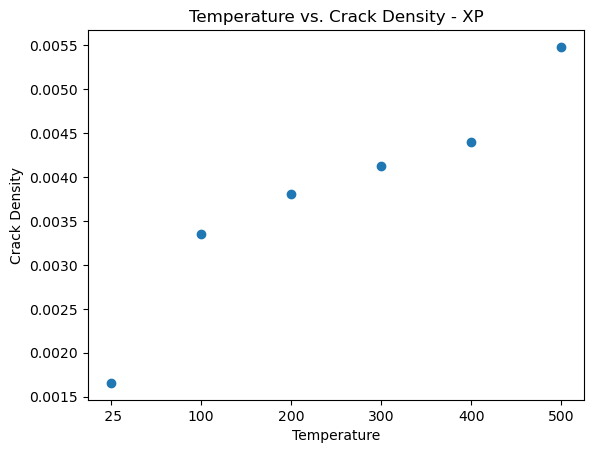

In [9]:
temperature = crackdensity_avg_df['Temperature']
crack_density = crackdensity_avg_df['Density']

# create scatter plot
plt.scatter(temperature, crack_density)

# add axis labels and title
plt.xlabel('Temperature')
plt.ylabel('Crack Density')
plt.title('Temperature vs. Crack Density - XP')

# display plot
plt.show()

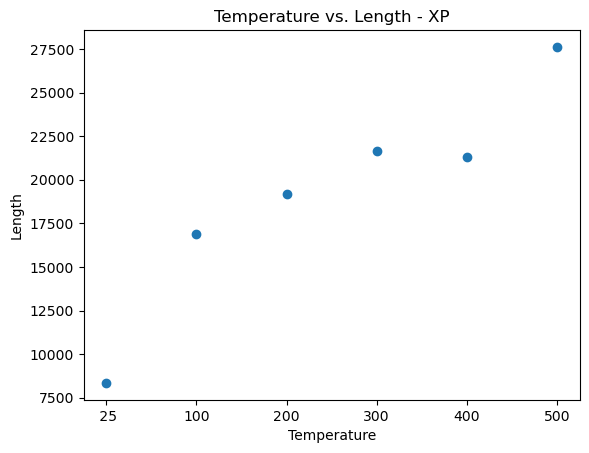

In [10]:
temperature = cracklength_avg_df['Temperature']
crack_density = cracklength_avg_df['Length']

# create scatter plot
plt.scatter(temperature, crack_density)

# add axis labels and title
plt.xlabel('Temperature')
plt.ylabel('Length')
plt.title('Temperature vs. Length - XP')

# display plot
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = crackdensity_df
shuffled_data = data.sample(frac=1, random_state=0)

# reset index
shuffled_data.reset_index(drop=True, inplace=True)

print(shuffled_data)


   Temperature   Density
0           25  0.000006
1          200  0.000000
2          300  0.007510
3          100  0.003331
4           25  0.000217
..         ...       ...
88         500  0.023849
89         400  0.024843
90         400  0.000317
91         300  0.003234
92         200  0.007575

[93 rows x 2 columns]


In [12]:
# split data into X and y variables
X = shuffled_data.iloc[:, :-1].values  # temperature column
y = shuffled_data.iloc[:, -1].values   # length column

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# make predictions on the test set
y_pred = regressor.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R² Score:', r2)

# make predictions on new data
new_temp = [[150],[420],[700]]  # new temperature values
new_pred = regressor.predict(new_temp)
print('Predicted Densities:', new_pred)

Mean Squared Error: 9.340434061347965e-06
R² Score: -0.6507320752092232
Predicted Densities: [0.00320998 0.00521262 0.00728943]


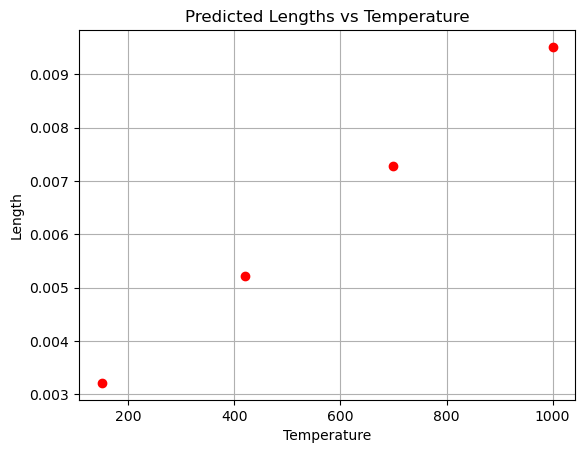

In [13]:
import matplotlib.pyplot as plt

new_temp = [[150], [420], [700], [1000]]  # new temperature values
new_pred = regressor.predict(new_temp)

# Plotting
plt.plot(new_temp, new_pred, 'ro')  # 'ro' for red dots
plt.xlabel('Temperature')
plt.ylabel('Length')
plt.title('Predicted Lengths vs Temperature')
plt.grid(True)
plt.show()

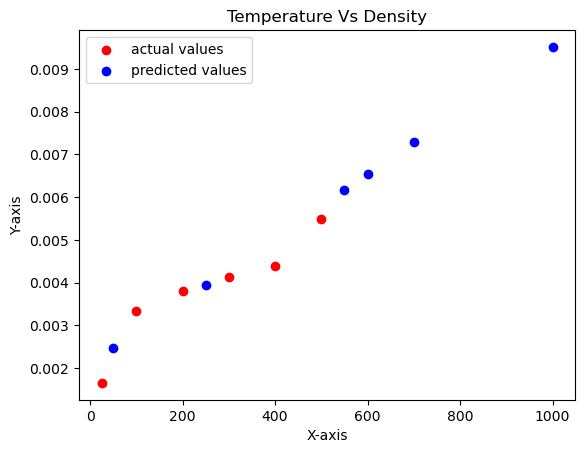

In [14]:
import matplotlib.pyplot as plt

# Data for the first scatter plot
x1 = [25,100,200,300,400,500]
y1 = crackdensity_avg_df['Density']

# Data for the second scatter plot
x2 = [50, 250, 550, 600, 700, 1000]
new_temp = [[50], [250], [550], [600], [700], [1000]]
y2 = regressor.predict(new_temp)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the first scatter plot
ax.scatter(x1, y1, color='red', label='actual values')

# Plot the second scatter plot
ax.scatter(x2, y2, color='blue', label='predicted values')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Temperature Vs Density')

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = cracklength_df
shuffled_data = data.sample(frac=1, random_state=0)

# reset index
shuffled_data.reset_index(drop=True, inplace=True)

print(shuffled_data)


   Temperature         Length
0           25      32.384776
1          200       0.000000
2          300   37842.284727
3          100   16782.959478
4           25    1093.467156
..         ...            ...
88         500  120172.905482
89         400  125181.477547
90         400    1598.854020
91         300   16297.242541
92         200   38168.762326

[93 rows x 2 columns]


In [17]:
# split data into X and y variables
X = shuffled_data.iloc[:, :-1].values  # temperature column
y = shuffled_data.iloc[:, -1].values   # length column

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a linear regression model
len_regressor = LinearRegression()
len_regressor.fit(X_train, y_train)

# make predictions on the test set
y_pred = len_regressor.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R² Score:', r2)

# make predictions on new data
new_temp = [[150],[420],[700]]  # new temperature values
new_pred = len_regressor.predict(new_temp)
print('Predicted Lengths:', new_pred)

Mean Squared Error: 237153519.63367397
R² Score: -0.6507320752092225
Predicted Lengths: [16174.62236093 26265.60070539 36730.31898854]


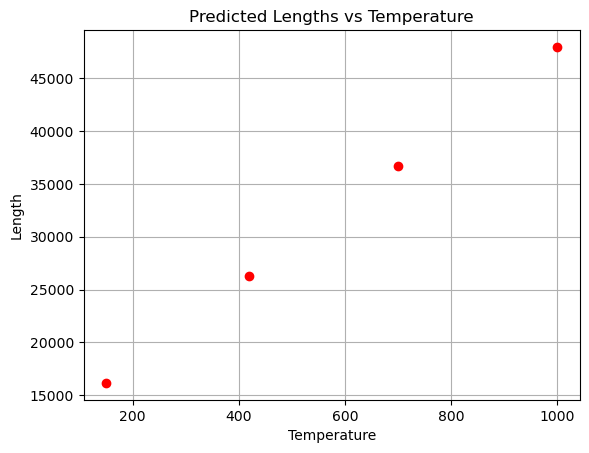

In [18]:
import matplotlib.pyplot as plt

new_temp = [[150], [420], [700], [1000]]  # new temperature values
new_pred = len_regressor.predict(new_temp)

# Plotting
plt.plot(new_temp, new_pred, 'ro')  # 'ro' for red dots
plt.xlabel('Temperature')
plt.ylabel('Length')
plt.title('Predicted Lengths vs Temperature')
plt.grid(True)
plt.show()


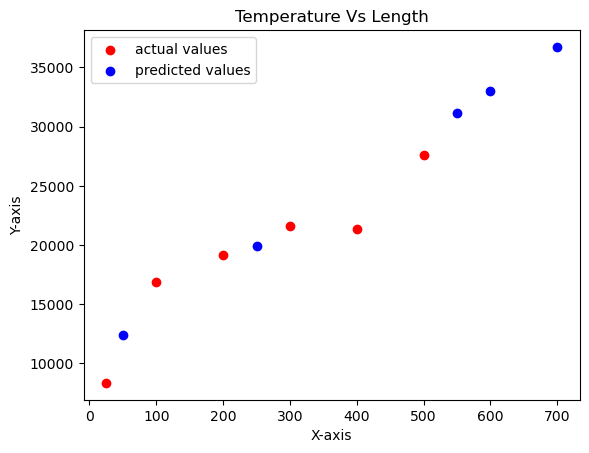

In [19]:
import matplotlib.pyplot as plt

# Data for the first scatter plot
x1 = [25,100,200,300,400,500]
y1 = cracklength_avg_df['Length']

# Data for the second scatter plot
x2 = [50, 250, 550, 600, 700]
new_temp = [[50], [250], [550], [600], [700]]
y2 = len_regressor.predict(new_temp)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the first scatter plot
ax.scatter(x1, y1, color='red', label='actual values')

# Plot the second scatter plot
ax.scatter(x2, y2, color='blue', label='predicted values')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Temperature Vs Length')

# Add a legend
ax.legend()

# Display the plot
plt.show()
